In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [2]:
df = pd.read_csv('framingham.csv')

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


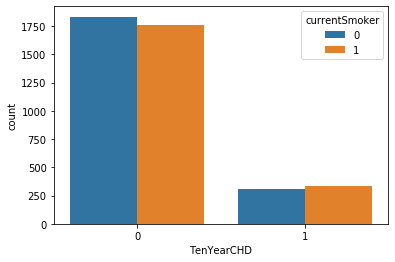

In [6]:
sns.countplot(x='TenYearCHD',data=df,hue='currentSmoker')

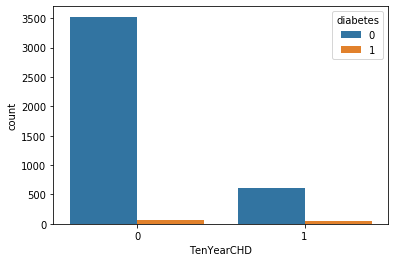

In [8]:
sns.countplot(x='TenYearCHD',data=df,hue='diabetes')

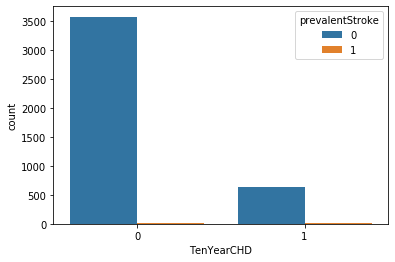

In [11]:
sns.countplot(x='TenYearCHD',data=df,hue='prevalentStroke')

In [33]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [20]:
df['totChol']=df['totChol'].fillna(df['totChol'].mean())
df['BPMeds']=df['BPMeds'].fillna(df['BPMeds'].mean())

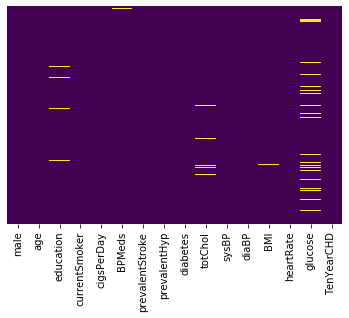

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
df['glucose']=df['glucose'].fillna(df['glucose'].mean())

In [9]:
df[df['currentSmoker']==1]['cigsPerDay'].mean()

18.35624394966118

In [10]:
df['education']=df['education'].fillna(2)

In [11]:
df['cigsPerDay'] = df1['cigsPerDay']

NameError: name 'df1' is not defined

In [12]:
def impute_cid(cols):
    smoker=cols[0]
    cigs=cols[1]
    if pd.isnull(cigs):
        if smoker ==1:
            return 18.35
        else :
            return 0
    else:
        return cigs
    

In [13]:
df['cigsPerDay']=df[['currentSmoker','cigsPerDay']].apply(impute_cid,axis=1)

In [15]:
df['BMI']=df['BMI'].fillna(df['BMI'].mean())

In [31]:
df.dropna(inplace=True)

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [35]:
x=df[['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']]
y=df['TenYearCHD']

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [37]:
lm = LogisticRegression()

In [38]:
lm.fit(x_train,y_train)

C:\Users\Adithya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
pred=lm.predict(x_test)

In [40]:
from sklearn.metrics import classification_report

In [41]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1083
           1       0.73      0.04      0.08       189

    accuracy                           0.86      1272
   macro avg       0.79      0.52      0.50      1272
weighted avg       0.84      0.86      0.80      1272



In [42]:
import tensorflow as tf

In [50]:
model = tf.keras.models.Sequential()

In [63]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(2,activation=tf.nn.softmax))

In [64]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics =['accuracy'])

In [65]:
model.fit(x_train,y_train,epochs=3)

Train on 2967 samples
Epoch 1/3
2967/2967 [==============================] - 3s 1ms/sample - loss: 0.4547 - accuracy: 0.8369
Epoch 2/3
2967/2967 [==============================] - 1s 297us/sample - loss: 0.4321 - accuracy: 0.8470
Epoch 3/3
2967/2967 [==============================] - 1s 291us/sample - loss: 0.4328 - accuracy: 0.8470


In [66]:
x_test= np.array(x_test)

In [67]:
y_test = np.array(y_test)

In [68]:
val_Acc ,val_loss = model.evaluate(x_test,y_test)

1272/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [71]:
val_loss

0.8514151